# Python API examples


## Creates

- createUser
- createMarket
- createTrade

### Create user

Creates a new user. Returns signature and verify keys.

~~~~
import requests
url = 'https://blocmarket.herokuapp.com/createUser'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example return as json:

~~~~
{'signingKey': '0cca0a3739eba76cc78823d9f6e898379014d8c53172f5e45c171a3c54a9f477',
 'traderId': '1',
 'verifyKey': 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'}
~~~~
        
### Create/update market

Creates/updates a market. Returns True and market details if successful. 

Specify:
- Market root and branch id
- Minimum and maximum outcomes
- Trader Id
- Sign and verify keys

Note that sending the private key is a terrible idea. In production signing is done on client side.

~~~~
sk = '0cca0a3739eba76cc78823d9f6e898379014d8c53172f5e45c171a3c54a9f477'
vk = 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'
tId = 2

url = 'https://blocmarket.herokuapp.com/createMarket'
headers = {'content-type': 'application/json'}
content_makemarket = {"signingKey": sk,
                    "traderId": tId, 
                    "verifyKey": vk,
                    "marketRootId": 1, 
                    "marketBranchId": 1, 
                    "marketMin": 0,
                    "marketMax":1}

response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
~~~~

Example return as json:

~~~~
 {'allChecks': 
     "{'marketId': '1', 'marketRangeChk': True,
     'sigChk': True, 'chainChk': True, 
     'ownerChk': True, 'timeChk': True}",
 'checks': 'False',
 'marketBranchId': 1,
 'marketId': 1,
 'marketMax': 0,
 'marketMin': 1,
 'marketRootId': 1,
 'traderId': 2}
~~~~
    
### Create trade

Create a trade. Returns True and trade details if successful.

Specify:

- Trader Id
- Market Id
- Price
- Quantity
- Sign and verify keys

~~~~
url = 'https://blocmarket.herokuapp.com/createTrade'
headers = {'content-type': 'application/json'}
content_maketrade = {"signingKey": sk,
                     "traderId": int(tId),
                     "verifyKey": vk,
                     "marketId": mkId,
                     "price": 0.55,
                     "quantity":1}
response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)



~~~~

Example return as json:
~~~~


{'allChecks': "{'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 1,
 'price': 0.55,
 'quantity': 1,
 'traderId': 1}
~~~~

## Views

- viewMarketBounds
- viewOrderBook
- viewOpenTrades
- viewMatchedTrades

### View markets

~~~~
url = 'https://blocmarket.herokuapp.com/viewMarketBounds'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":2,"2":3,"3":4},
"marketRootId":{"0":1,"1":2,"2":3,"3":4},
"marketBranchId":{"0":1,"1":1,"2":1,"3":1},
"marketMin":{"0":0.0,"1":0.0,"2":0.0,"3":0.0},
"marketMax":{"0":0.7,"1":0.7,"2":0.7,"3":0.7}}'
~~~~

### View full order book

~~~~
url = 'https://blocmarket.herokuapp.com/viewOrderBook'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1,"2":1},"price":{"0":0.55,"1":0.55,"2":0.55},
"quantity":{"0":1.0,"1":-1.0,"2":-1.0},"traderId":{"0":1,"1":1,"2":1},
"iMatched":{"0":true,"1":true,"2":true},
"timeStampUTC":{"0":1547976585838,"1":1547976602766,"2":1547976613155}}'
~~~~

Using a stream is only necessary if the order book is large and the request is truncated by the server, but it doesn't do any harm.

### View open trades

~~~~
url = 'https://https://blocmarket.herokuapp.com/viewOpenTrades'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)
~~~~

~~~~
'{"marketId":{"12":1,"15":1,"18":1,"21":1,"24":1},
"price":{"12":0.43,"15":0.43,"18":0.43,"21":0.43,"24":0.43},
"quantity":{"12":-1.0,"15":-1.0,"18":-1.0,"21":-1.0,"24":-1.0},
"traderId":{"12":1,"15":1,"18":1,"21":1,"24":1},"timeStampUTC":
{"12":1547976742476,"15":1547976750344,"18":1547976758683,"21":1547976768968,"24":1547976775537}}'
~~~~

### View matched trades

~~~~
url = 'https://blocmarket.herokuapp.com/viewMatchedTrades'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1},"price":{"0":0.43,"1":0.55},"quantity":{"0":0.0,"1":0.0},"traderId":{"0":1,"1":1}}'

~~~~

### View trader summary

A view joining order book and marketTable for a particular trader.

~~~~
url = 'https://blocmarket.herokuapp.com/viewTradeSummary'
headers = {'content-type': 'application/json'}
content = {'traderId': 2}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1},"price":{"0":0.8,"1":0.5},
"quantity":{"0":-1.0,"1":-1.0},"traderId":{"0":2,"1":2},
"iMatched":{"0":false,"1":true},
"timeStampUTC":{"0":1547982939316,"1":1547982938964},
"marketMin":{"0":0.0,"1":0.0},"marketMax":{"0":1.0,"1":1.0}}'
~~~~


# Python demonstration

In [560]:
import requests
import json
import numpy as np
import pandas as pd
import time

%matplotlib inline
import matplotlib.pyplot as plt

# Running flask app from powershell
# $env:FLASK_APP = "api"
# $env:FLASK_ENV = "development"
# flask run

# Running flask from terminal on OSX
# export FLASK_APP=api
# export FLASK_ENV=development
# flask run

# Running with gunicorn (heroku, digitalocean, etc):
# Procfile >
# web: gunicorn wsgi --log-file -
# wsgi.py >
# from api import app as application
#
#if __name__ == "__main__":
#    application.run()

# https://devcenter.heroku.com/articles/getting-started-with-python
# https://www.digitalocean.com/community/tutorials/how-to-serve-flask-applications-with-gunicorn-and-nginx-on-ubuntu-14-04


In [561]:
# baseurl = 'https://blocmarket.herokuapp.com/'
# baseurl = 'http://127.0.0.1:5000/'
baseurl = 'http://127.0.0.1:7000/'

In [578]:
# Create a new user
url = baseurl +'createUser'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [579]:
# View response as json
response.json()

{'signingKey': '60d40576d8f335c49ff47f303d85dba1cdfa04c4891e5bdc77c0ab7c63df9635',
 'traderId': '1',
 'verifyKey': 'cd0c1e893725cda795a55221223f6881c0702209a8b9920f669cf98c634ce9d9'}

In [580]:
# Copy keys and traderid from response
sk = response.json()['signingKey']
vk = response.json()['verifyKey']
tId = int(response.json()['traderId'])


In [581]:
# Create a new market
mkRtId = 1
mkBrId = 1


url = baseurl + 'createMarket'
content_makemarket = {"signingKey": sk,
                        "traderId": tId, 
                        "verifyKey": vk,
                        "marketRootId": mkRtId, 
                        "marketBranchId": mkBrId, 
                        "marketMin": 0.11,
                        "marketMax":0.7}
# Post market
response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)


In [582]:
# response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
# View response as json
response.json()

{'allChecks': "{'marketLimitChk': True, 'traderIdChk': True, 'marketId': '1', 'marketRangeChk': True, 'marketIndChk': True, 'sigChk': True, 'chainChk': True, 'ownerChk': True, 'timeChk': True}",
 'checks': 'True',
 'marketBranchId': 1,
 'marketId': 1,
 'marketMax': 0.7,
 'marketMin': 0.11,
 'marketRootId': 1,
 'traderId': 1}

In [583]:
# Save market id from response
mkId = response.json()['marketId']


In [584]:
# Create a trade
url = baseurl+'createTrade'

content_maketrade = {"signingKey": sk,
                     "traderId": tId,
                     "verifyKey": vk,
                     "marketId": mkId,
                     "price": 0.5512,
                     "quantity":1}
response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)

In [585]:
# View response as json
response.json()

{'allChecks': "{'traderIdChk': True, 'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 1,
 'price': 0.5512,
 'quantity': 1,
 'traderId': 1}

In [586]:
# View response as a dataframe
pd.DataFrame(response.json(), index=[0])


,allChecks,checks,marketId,price,quantity,traderId
0,"{'traderIdChk': True, 'marketChk': True, 'sigC...",True,1,0.5512,1,1


In [587]:
# Create a matched trade
url = baseurl+'createTrade'
content_maketrade['quantity'] = -1
response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)

In [588]:
# View
response.json()

{'allChecks': "{'traderIdChk': True, 'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 1,
 'price': 0.5512,
 'quantity': -1,
 'traderId': 1}

In [589]:
# Create many matched trades
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    content_maketrade['quantity']=1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('matched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


matched trade: 0 in 0.17884492874145508 seconds.
matched trade: 1 in 0.1688699722290039 seconds.
matched trade: 2 in 0.16845393180847168 seconds.
matched trade: 3 in 0.15869808197021484 seconds.
matched trade: 4 in 0.19081997871398926 seconds.


In [590]:
content_maketrade

{'signingKey': '60d40576d8f335c49ff47f303d85dba1cdfa04c4891e5bdc77c0ab7c63df9635',
 'traderId': 1,
 'verifyKey': 'cd0c1e893725cda795a55221223f6881c0702209a8b9920f669cf98c634ce9d9',
 'marketId': 1,
 'price': 0.5512,
 'quantity': 1}

In [591]:
# Create many markets
url = baseurl+'createMarket'

for i in range(10):
    t = time.time()

    content_makemarket = {"signingKey": sk,
      "traderId": int(tId), "verifyKey": vk,
      "marketRootId": i+1, "marketBranchId": 1, "marketMin": 0, "marketMax":0.7}

    response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
    if response.json()['checks'] == 'True':
        print('market created: ' + str(i+1) + ' in ' + str(time.time() - t) + ' seconds.')
    else:
        print('failed to create market ' +str(i+1))
    

market created: 1 in 0.25415706634521484 seconds.
market created: 2 in 0.31121301651000977 seconds.
market created: 3 in 0.47290706634521484 seconds.
market created: 4 in 0.7727880477905273 seconds.
market created: 5 in 1.516484022140503 seconds.
market created: 6 in 3.052907943725586 seconds.
failed to create market 7
failed to create market 8
failed to create market 9
failed to create market 10


In [592]:
response.json()

{'allChecks': "{'marketLimitChk': False, 'traderIdChk': True, 'marketId': '7', 'marketRangeChk': True, 'marketIndChk': True, 'sigChk': True, 'chainChk': True, 'ownerChk': True, 'timeChk': True}",
 'checks': 'False',
 'marketBranchId': 1,
 'marketId': 7,
 'marketMax': 0.7,
 'marketMin': 0,
 'marketRootId': 10,
 'traderId': 1}

In [ ]:
# Create many sub-markets
url = baseurl+'createMarket'

for i in range(10):
    t = time.time()

    content_makemarket = {"signingKey": sk,
      "traderId": int(tId), "verifyKey": vk,
      "marketRootId": 1, "marketBranchId": 1+i, "marketMin": 0, "marketMax":0.7}

    response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
    if response.json()['checks'] == 'True':
        print('market created: ' + str(i+1) + ' in ' + str(time.time() - t) + ' seconds.')
    else:
        print('failed to create sub market ' +str(i+1))
    

failed to create sub market 1
market created: 2 in 3.3310840129852295 seconds.
market created: 3 in 3.2788941860198975 seconds.
market created: 4 in 3.4028282165527344 seconds.
market created: 5 in 3.6173579692840576 seconds.
market created: 6 in 3.696617841720581 seconds.
market created: 7 in 3.941301107406616 seconds.
market created: 8 in 4.017486095428467 seconds.
market created: 9 in 4.054191827774048 seconds.


In [559]:
response.json()

{'allChecks': "{'marketLimitChk': False, 'traderIdChk': True, 'marketId': '7', 'marketRangeChk': True, 'marketIndChk': True, 'sigChk': True, 'chainChk': True, 'ownerChk': True, 'timeChk': True}",
 'checks': 'False',
 'marketBranchId': 10,
 'marketId': 7,
 'marketMax': 0.7,
 'marketMin': 0,
 'marketRootId': 1,
 'traderId': 1}

In [540]:
# View maximum and minimum of each market
url = baseurl+'viewMarketBounds'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)


In [541]:
pd.read_json(response.json())


,marketId,marketRootId,marketBranchId,marketMin,marketMax
0,1,1,1,0.11,0.7
1,2,2,1,0.00,0.7
2,3,3,1,0.00,0.7
3,4,4,1,0.00,0.7
4,5,5,1,0.00,0.7
5,6,6,1,0.00,0.7


In [542]:
# View whole order book
url = baseurl+'viewOrderBook'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)

In [543]:
pd.read_json(response.json())


,marketId,price,quantity,traderId,iMatched,timeStampUTC
0,1,0.5512,1,1,True,2019-02-03 09:38:43.540
1,1,0.5512,-1,1,True,2019-02-03 09:39:01.827
10,1,0.5512,-1,1,True,2019-02-03 09:40:13.361
11,1,0.5512,1,1,True,2019-02-03 09:40:13.441
2,1,0.5512,-1,1,True,2019-02-03 09:40:12.740
3,1,0.5512,1,1,True,2019-02-03 09:40:12.824
4,1,0.5512,-1,1,True,2019-02-03 09:40:12.904
5,1,0.5512,1,1,True,2019-02-03 09:40:12.981
6,1,0.5512,-1,1,True,2019-02-03 09:40:13.060
7,1,0.5512,1,1,True,2019-02-03 09:40:13.145


In [544]:
# Create many unmatched trades
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    content_maketrade['price'] = 0.43
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('unmatched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


unmatched trade: 0 in 0.0974571704864502 seconds.
unmatched trade: 1 in 0.08384394645690918 seconds.
unmatched trade: 2 in 0.07860183715820312 seconds.
unmatched trade: 3 in 0.08404779434204102 seconds.
unmatched trade: 4 in 0.07705903053283691 seconds.


In [545]:
a = response.json()
a

{'allChecks': "{'traderIdChk': True, 'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 1,
 'price': 0.43,
 'quantity': -1,
 'traderId': 1}

In [546]:
# View all open (unmatched trades)
url = baseurl+'viewOpenTrades'

content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [547]:
response.json()

'{"marketId":{"12":1,"13":1,"14":1,"15":1,"16":1},"price":{"12":0.43,"13":0.43,"14":0.43,"15":0.43,"16":0.43},"quantity":{"12":-1.0,"13":-1.0,"14":-1.0,"15":-1.0,"16":-1.0},"traderId":{"12":1,"13":1,"14":1,"15":1,"16":1},"timeStampUTC":{"12":1549186917413,"13":1549186917500,"14":1549186917577,"15":1549186917662,"16":1549186917739}}'

In [548]:
pd.read_json(response.json())

,marketId,price,quantity,traderId,timeStampUTC
12,1,0.43,-1,1,2019-02-03 09:41:57.413
13,1,0.43,-1,1,2019-02-03 09:41:57.500
14,1,0.43,-1,1,2019-02-03 09:41:57.577
15,1,0.43,-1,1,2019-02-03 09:41:57.662
16,1,0.43,-1,1,2019-02-03 09:41:57.739


In [549]:
# View matched trades (summed over marketId/price/traderId)
url = baseurl+'viewMatchedTrades'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)

In [550]:
pd.read_json(response.json())

,marketId,price,quantity,traderId
0,1,0.5512,0,1


In [494]:
# Create many matched trades (own)
url = baseurl+'createTrade'

for i in range(5): 
    t = time.time()
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    content_maketrade['quantity']=1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('matched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


matched trade: 0 in 0.1789259910583496 seconds.
matched trade: 1 in 0.16098785400390625 seconds.
matched trade: 2 in 0.1555929183959961 seconds.
matched trade: 3 in 0.16343903541564941 seconds.
matched trade: 4 in 0.18027782440185547 seconds.


In [551]:
# View summary of trader for a particular trader
url = baseurl+'viewTradeSummary'
content = {'traderId': int(tId)}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)

In [552]:
pd.read_json(response.json())

,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
0,1,0.5512,1,1,True,2019-02-03 09:38:43.540,0.11,0.7,-0.4412,0.1488
1,1,0.5512,-1,1,True,2019-02-03 09:39:01.827,0.11,0.7,0.4412,-0.1488
10,1,0.5512,-1,1,True,2019-02-03 09:40:13.361,0.11,0.7,0.4412,-0.1488
11,1,0.5512,1,1,True,2019-02-03 09:40:13.441,0.11,0.7,-0.4412,0.1488
12,1,0.4300,-1,1,False,2019-02-03 09:41:57.413,0.11,0.7,0.3200,-0.2700
13,1,0.4300,-1,1,False,2019-02-03 09:41:57.500,0.11,0.7,0.3200,-0.2700
14,1,0.4300,-1,1,False,2019-02-03 09:41:57.577,0.11,0.7,0.3200,-0.2700
15,1,0.4300,-1,1,False,2019-02-03 09:41:57.662,0.11,0.7,0.3200,-0.2700
16,1,0.4300,-1,1,False,2019-02-03 09:41:57.739,0.11,0.7,0.3200,-0.2700
2,1,0.5512,-1,1,True,2019-02-03 09:40:12.740,0.11,0.7,0.4412,-0.1488


In [553]:
# Get a signed UTC timestamp
url = baseurl+'getSignedUTCTimestamp'
content = {}
response = requests.get(url, data=json.dumps(content), headers=headers)


In [554]:
response.json()

{'timeStampUTC': '2019-02-03 09:51:56.195118',
 'timeStampUTCSignature': 'b"\\x8e\\xc9R*\\xac\\xf6\\xc7\\xaf\\xf9\\xe8@\\xfe\\x8dY\\x16$\\\\\\xb6M5\\xa4;\\xdfL0\\xcdc\\xeb:u{T\\xaeE\\xa8\'\\xf8\\x18,o\\xc3\\x9f\\x05\\x87\\x98.M\'XV_\\x94\\xe8!\\xf0\\xe5rtU\\xb9\\x15\\xc2\\\\\\x0c"',
 'verifyKey': 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'}

In [555]:
# A simple robot making a bid/offer with an OU process

url = baseurl+'createTrade'

m = 0.5
k = -0.001
v = 0.01
B = m

for i in range(5000):
    # Create bounded [0,1] random reverting to m
    dW = np.random.normal()
    if i==0:
        dLnB = v*dW
    else:
        dLnB = -k*(np.log(B)-m) + v*dW
    
    # Bound between zero and one
    B *= np.exp(dLnB)
    B = min(max(B, 0.01),0.99)
    
    # Make a bid
    content_maketrade['price'] = B-0.01
    content_maketrade['quantity'] =1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    # Make an offer
    content_maketrade['price'] = B+0.01
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    #time.sleep(0.1)
    
    # Remove bid
    content_maketrade['price'] = B-0.01
    content_maketrade['quantity'] =-1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    # Remove offer
    content_maketrade['price'] = B+0.01
    content_maketrade['quantity'] = 1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('Price for iteration ' + str(i) + ' : ' + str(content_maketrade['price']))

Price for iteration 0 : 0.5206218884532547
Price for iteration 1 : 0.5291804392695841
Price for iteration 2 : 0.5352590989284264
Price for iteration 3 : 0.534899314178636
Price for iteration 4 : 0.5241909342574853
Price for iteration 5 : 0.5201482338171773
Price for iteration 6 : 0.5166385532936223
Price for iteration 7 : 0.5081211557227566
Price for iteration 8 : 0.5067004997774847
Price for iteration 9 : 0.5139616914625755
Price for iteration 10 : 0.5109786696411593
Price for iteration 11 : 0.5136881575115907
Price for iteration 12 : 0.5203379282778919
Price for iteration 13 : 0.5109839237372406
Price for iteration 14 : 0.5077428256938735
Price for iteration 15 : 0.5025240390822158
Price for iteration 16 : 0.499395172489994
Price for iteration 17 : 0.4985651375745536
Price for iteration 18 : 0.5020865518273685
Price for iteration 19 : 0.49766094741240563
Price for iteration 20 : 0.49282474356744943
Price for iteration 21 : 0.49574611945348657
Price for iteration 22 : 0.49753035489538

KeyboardInterrupt: 

In [556]:
# Get summary for this market and plot

url = baseurl+'viewTradeSummary'
content = {'traderId': int(tId)}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)
a = pd.read_json(response.json())
a = a[a['marketId'] == mkId]
a = a.set_index(a['timeStampUTC'])
a


,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
timeStampUTC,,,,,,,,,,
2019-02-03 09:38:43.540,1,0.551200,1,1,True,2019-02-03 09:38:43.540,0.11,0.7,-0.441200,0.148800
2019-02-03 09:39:01.827,1,0.551200,-1,1,True,2019-02-03 09:39:01.827,0.11,0.7,0.441200,-0.148800
2019-02-03 09:40:13.361,1,0.551200,-1,1,True,2019-02-03 09:40:13.361,0.11,0.7,0.441200,-0.148800
2019-02-03 09:52:19.834,1,0.492825,1,1,True,2019-02-03 09:52:19.834,0.11,0.7,-0.382825,0.207175
2019-02-03 09:53:31.726,1,0.390065,1,1,True,2019-02-03 09:53:31.726,0.11,0.7,-0.280065,0.309935
2019-02-03 09:53:31.816,1,0.369739,1,1,True,2019-02-03 09:53:31.816,0.11,0.7,-0.259739,0.330261
2019-02-03 09:53:32.014,1,0.369739,-1,1,True,2019-02-03 09:53:32.014,0.11,0.7,0.259739,-0.330261
2019-02-03 09:53:31.913,1,0.389739,-1,1,True,2019-02-03 09:53:31.913,0.11,0.7,0.279739,-0.310261
2019-02-03 09:53:32.110,1,0.389739,1,1,True,2019-02-03 09:53:32.110,0.11,0.7,-0.279739,0.310261


Text(0.5, 1.0, 'Time series for market 1 / trader 1')

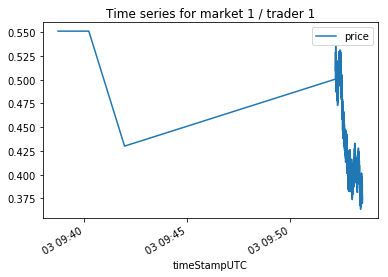

In [557]:
plt.figure(); a['price'].plot(); plt.legend(loc='best'); plt.title('Time series for market ' + str(mkId) + ' / trader ' +str(tId))


# Curl API examples



## Create user

~~~~
curl --header "Content-Type: application/json" -X POST http://blocmarket.herokuapp.com/createUser
~~~~
        
## Create market

~~~~
curl --data '{"signingKey_hex": "ece2efc138c8298d43caba1315ceda614e20644c74d46fed37871c47ea19afdf",
"traderId": 1, 
"verifyKey_hex": "9690a2e12971ae452d68bf3d08405090d45791533cf80740fd186aea4b6773fc",
"marketRootId": 1, 
"marketBranchId": 5, 
"marketMin": 0, 
"marketMax": 1}' 
--header "Content-Type: application/json" -X POST http://blocmarket.herokuapp.com/createMarket
~~~~
    
## Create trade

~~~~
curl --data '{"signingKey_hex": "ece2efc138c8298d43caba1315ceda614e20644c74d46fed37871c47ea19afdf",
"traderId": 1, 
"verifyKey_hex": "9690a2e12971ae452d68bf3d08405090d45791533cf80740fd186aea4b6773fc",
"marketId": 1,
"price": 0.1212,
"quantity": 1}' --header "Content-Type: application/json" -X POST http://blocmarket.herokuapp.com/createTrade

~~~~
        
## View order book (output to file)

~~~~
curl --header "Content-Type: application/json" -X POST http://blocmarket.herokuapp.com/viewOrderBook --output ob.txt
~~~~    
        
Also can load json from file with something like 
~~~~ 
curl -d "@data.json" -X POST http://blocmarket.herokuapp.com/data 
~~~~


# Matlab API examples


## Create user

~~~~
resp = webread('http://blocmarket.herokuapp.com/createUser')

~~~~

Returns something like

~~~~
'{"signingKey": '57f611e7cb7c5d4123be69663ccd06442c64db1a4f1161399dbb1b9bb6cc0e06'
           "traderId": '2'
      "verifyKey": 'ddaa5b0119a4ccfeffa36be0e6aac3682f798d021d5ded1d90512f2226e727b5'}'
~~~~

## Create market

~~~~
data = struct('signingKey', signingKey,...
'traderId', tId, ...
'verifyKey', verifyKey ,...
'marketRootId', 2, ...
'marketBranchId', 1, ...
'marketMin', 0.01, ...
'marketMax', 1)
resp = webwrite('http://blocmarket.herokuapp.com/createMarket', data, weboptions('RequestMethod', 'post','MediaType', 'application/json'))
~~~~

Returns something like

~~~~
'{
             "checks": 'True'
     "marketBranchId": 1
          "marketMax": 1
          "marketMin": 0.0100
       "marketRootId": 2
           "traderId": 1
}'
~~~~
## Create trade

~~~~
data = struct('signingKey', signingKey,...
'traderId', tId,...
'verifyKey', verifyKey ,...
'marketId', 1,...
'price', 0.51,...
'quantity', 1)
resp = webwrite('http://blocmarket.herokuapp.com/createTrade', data, weboptions('MediaType', 'application/json'))
~~~~

Returns something like
~~~~
'{
       "checks": 'True'
     "marketId": 1
        "price": 0.5100
     "quantity": 1
     "traderId": 1
 '}S
~~~~

## View market bounds
~~~~
resp = webwrite('http://blocmarket.herokuapp.com/viewMarketBounds', weboptions('RequestMethod', 'post','contentType', 'json', 'Timeout', 10))
~~~~

## View order book
~~~~
resp = webwrite('http://blocmarket.herokuapp.com/viewOrderBook', weboptions('RequestMethod', 'post','contentType', 'json'), 'Timeout', 10)
~~~~

## View trade summary

~~~~
data = struct('traderId',1);
resp = webwrite('http://blocmarket.herokuapp.com/viewTradeSummary', data, weboptions('RequestMethod', 'post','MediaType', 'application/json', 'Timeout', 10))
~~~~


# Powershell

TODO


    

test cases with mismatched traderId/verifyKey
javascript 
